#### Import neccesary libraries

In [41]:
import pandas as pd
import os
import seaborn
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

#### Read a file

In [2]:
file_path= r"C:\Users\AF8681\OneDrive - Zebra Technologies\Desktop\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"
file_list = os.listdir(file_path)

##### Merging 12 csv files with the same schema into one file

In [4]:
df_concat = pd.concat([pd.read_csv(file_path + "/" + f) for f in file_list ], ignore_index=True)

#### Cleaning part

##### Get rid of null values

In [5]:
df_concat.dropna(inplace = True)

##### Remove incorrect data from column "Order ID"

In [6]:
index = df_concat[df_concat['Order ID'] == 'Order ID'].index
df_concat.drop(index, inplace = True)

##### Set correct data types with mapper

In [7]:
df_concat = df_concat.astype(
    {
     'Order ID': int,
     'Product': str,
     'Quantity Ordered': int,
     'Price Each': float,
     'Order Date': str,
     'Purchase Address': str
    })
     

#### Analysis part

##### Question 1: What was the best month for sales? How much was earned that month?

Extract month from string

In [8]:
df_concat['Month'] = [month.split("/")[0] for month in df_concat['Order Date']]

Calculate profit

In [9]:
df_concat['Profit'] = df_concat['Quantity Ordered'] * df_concat['Price Each']

Group by month to sum profit

In [10]:
monthly_profit = df_concat[['Month', 'Profit']].groupby('Month').sum()
max_profit_month = monthly_profit['Profit'].idxmax()

Answer: December was the best month for sales: 4613443.34

##### Question 2: What city had the highest number of sales?

Extract city from string

In [12]:
df_concat['City'] = [city.split(",")[1] for city in df_concat['Purchase Address']]

In [13]:
city_profit = df_concat[["City", "Profit"]].groupby("City").sum()
city_profit['Profit'].idxmax()

' San Francisco'

Answer: Maximum sales were in San Francisco: 2747755.48

#### Question 3: What time should we display advertisememnts to maximize likelihood of customer's buying product?

Convert column to date and time format in order to easily extract hour

In [14]:
df_concat["Order Date"] = pd.to_datetime(df_concat["Order Date"])

C:\Users\AF8681\AppData\Local\Temp\ipykernel_8684\1512091181.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_concat["Order Date"] = pd.to_datetime(df_concat["Order Date"])


In [15]:
df_concat["Hour"] = df_concat['Order Date'].dt.hour

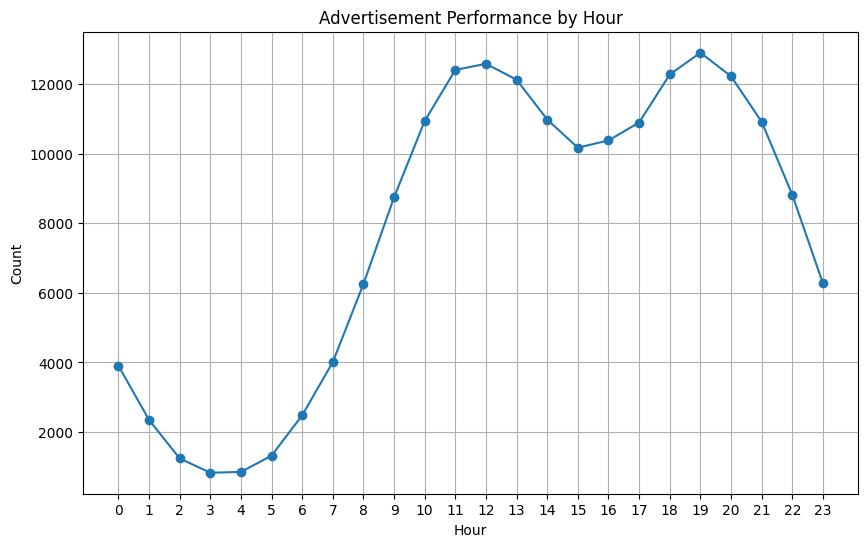

In [16]:
# First, group by 'Hour' and count occurrences
hourly_counts = df_concat.groupby('Hour').size()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')

# Add labels and title
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Advertisement Performance by Hour')

# Show the plot
plt.xticks(hourly_counts.index)  # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.show()

Answer: The best time for advertisements is from 11am to 1pm and from 6mp to 8pm.

#### Question 4: What products are most often sold together?

I am interested in duplicated Order IDs, because it means that the same customer made order more than once

In [17]:
df = df_concat[df_concat["Order ID"].duplicated(keep = False)]

Create pairs

In [18]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\AF8681\AppData\Local\Temp\ipykernel_8684\2345761670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


Remove duplicates

In [22]:
df = df[["Order ID", "Grouped"]].drop_duplicates()

Count pairs

In [25]:
from itertools import combinations
from collections import Counter

count = Counter()

#returns dictionary where key is tuple and value is number
for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
    

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [27]:
#by specifying key=d.get we can ensure that the comparison is based on the dictionary values rather than the keys
res = max(count, key = count.get)

('iPhone', 'Lightning Charging Cable')

Answer: 'iPhone' and 'Lightning Charging Cable' are the most often sold together

#### Question 5: What product sold the most?

In [38]:
df_concat[["Product", "Quantity Ordered"]].groupby("Product").sum()["Quantity Ordered"].idxmax()

'AAA Batteries (4-pack)'

Answer: AAA Batteries (4-pack) sold the most.